In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # May also need to pip install openpyxl
from scipy.optimize import curve_fit


C:\Users\mha114\AppData\Local\Temp\ipykernel_13804\1636004140.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # May also need to pip install openpyxl


In [2]:
# Paths
s2a_psf_file = "S2A_PSF.xlsx"

In [3]:
# Read from excel file
psf_raw = pd.read_excel(s2a_psf_file, sheet_name="S2A_PSF_B01", header=None)

In [4]:
# Convert to list of rows with float values
psf_rows = []
for _, row in psf_raw.iterrows():
    row_str_array = row.iloc[0].split(",")  # Split on commas
    psf_rows.append([float(s) for s in row_str_array])  # Convert to floats

In [5]:
# Convert to 2D array and normalize
psf = np.array(psf_rows)
psf_norm = psf / np.max(psf)

In [6]:
# Define x array (position in sub-pixels)
subsampling = 5
center_index = 16
psf_length = 33
x = (np.arange(psf_length) - center_index) / subsampling

In [7]:
# Plot normalized values for center horizontal row ("across-track")
print("Position (in pixels): Value")
for xi, value in zip(x, psf_norm[16]):
    print(f"{xi}: {value}")

Position (in pixels): Value
-3.2: -8.554646840148699e-05
-3.0: -9.154646840148698e-05
-2.8: -0.00010438661710037175
-2.6: -0.00012584014869888475
-2.4: -0.00015802230483271374
-2.2: -0.00019647211895910778
-2.0: -0.00018602973977695168
-1.8: 0.00018827509293680296
-1.6: 0.0022594795539033455
-1.4: 0.010425278810408922
-1.2: 0.03591040892193308
-1.0: 0.10002230483271375
-0.8: 0.22969516728624534
-0.6: 0.4375092936802974
-0.4: 0.6926394052044609
-0.2: 0.9123048327137546
0.0: 1.0
0.2: 0.9123048327137546
0.4: 0.6926394052044609
0.6: 0.4375092936802974
0.8: 0.22969516728624534
1.0: 0.10002230483271375
1.2: 0.03591040892193308
1.4: 0.010425278810408922
1.6: 0.0022594795539033455
1.8: 0.00018827509293680296
2.0: -0.00018602973977695168
2.2: -0.00019647211895910778
2.4: -0.00015802230483271374
2.6: -0.00012584014869888475
2.8: -0.00010438661710037175
3.0: -9.154646840148698e-05
3.2: -8.554646840148699e-05


A Gaussian distribution has a value of 0.606 of its maximum value at a distance sigma
from the center. In the list above, we see that the normalized value passes the value
0.606 between 0.4 and 0.6 pixels from the center. As a rough approximation, this means
that a sigma value of 0.45 is a suitable value for this specific PSF, in the horizontal 
(across-track) direction. This can be calucated more accurately by fitting a gaussian
function to the PSF values. 

In [8]:
# Plot normalized values for center vertical column ("along-track")
print("Position (in pixels): Value")
for xi, value in zip(x, psf_norm[:, 16]):
    print(f"{xi}: {value}")

Position (in pixels): Value
-3.2: -6.92267657992565e-05
-3.0: -7.512639405204461e-05
-2.8: -8.779925650557621e-05
-2.6: -0.0001083271375464684
-2.4: -0.0001325910780669145
-2.2: -0.00012129739776951673
-2.0: 0.0001283531598513011
-1.8: 0.001418736059479554
-1.6: 0.006307806691449813
-1.4: 0.021370631970260224
-1.2: 0.05994052044609665
-1.0: 0.14221189591078068
-0.8: 0.2874089219330855
-0.6: 0.4961710037174721
-0.4: 0.7324535315985129
-0.2: 0.9251301115241635
0.0: 1.0
0.2: 0.9251301115241635
0.4: 0.7324535315985129
0.6: 0.4961710037174721
0.8: 0.2874089219330855
1.0: 0.14221189591078068
1.2: 0.05994052044609665
1.4: 0.021370631970260224
1.6: 0.006307806691449813
1.8: 0.001418736059479554
2.0: 0.0001283531598513011
2.2: -0.00012129739776951673
2.4: -0.0001325910780669145
2.6: -0.0001083271375464684
2.8: -8.779925650557621e-05
3.0: -7.512639405204461e-05
3.2: -6.92267657992565e-05


We can see that the PSF is slightly wider in the along-track direction. By rough
estimation, the PSF passes the 0.606 point at approximately 0.5 pixels from the center. 

Text(0.5, 0, 'Pixels')

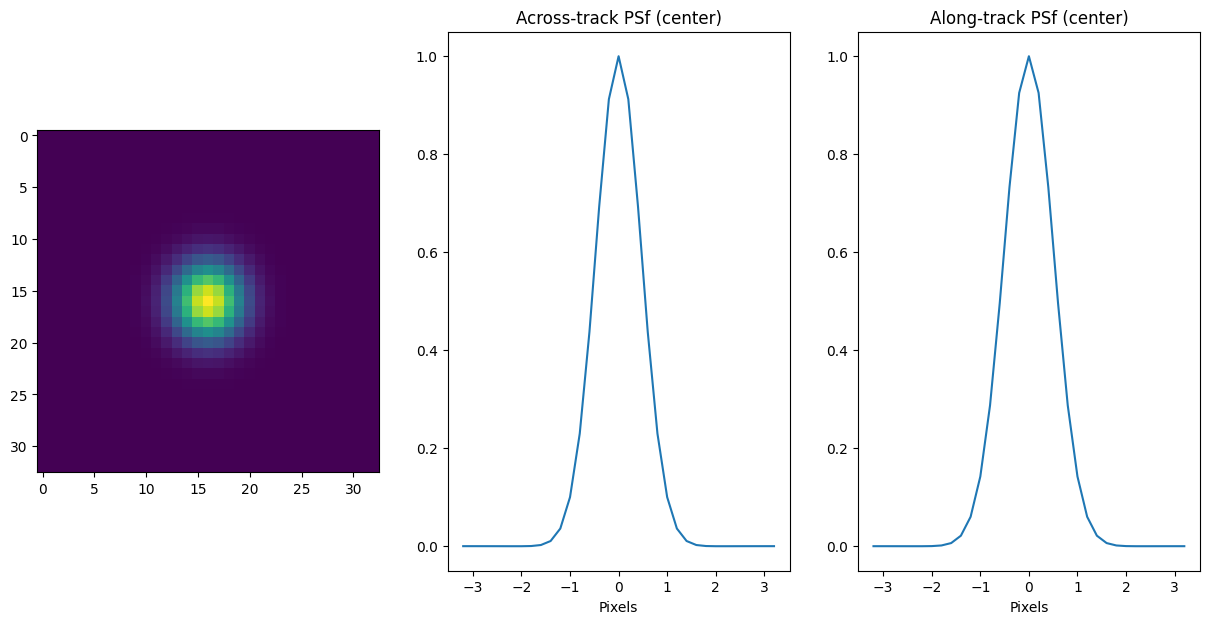

In [9]:
# Plot the point spread functions
fig, ax = plt.subplots(ncols=3, figsize=(15, 7))
ax[0].imshow(psf_norm)
ax[1].plot(x, psf_norm[16])
ax[2].plot(x, psf_norm[:, 16])
ax[1].set_title("Across-track PSf (center)")
ax[1].set_xlabel("Pixels")
ax[2].set_title("Along-track PSf (center)")
ax[2].set_xlabel("Pixels")
